In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rn
import numpy as np
from collections import Counter
from operator import itemgetter

In [19]:
#Solution
#Random graph - implementation of Paul Erdős and Alfred Rényi theory
def RandomGraph(n,p):
    G = nx.Graph()
    N = range(n)
    nodes = list(N)
    G.add_nodes_from(nodes)
    for i in G.nodes():
        for k in range(i, len(G.nodes())):
            if i != k:
                if rn.random() <= p:
                    G.add_edges_from([(nodes[i],nodes[k])])
                else:
                    continue
    return G

Number of edges:  1399294
Number of nodes:  2000
Average degree:  1399.294
Variance of the degree distribution:  474721.0


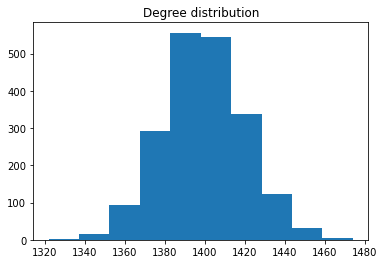

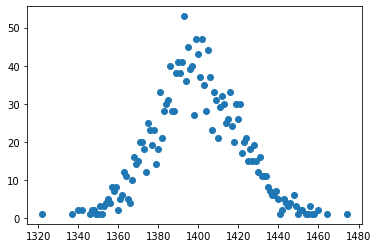

In [26]:
n = 2000
p = 0.7

G = RandomGraph(n,p)

#GRAPH PLOT
#plt.title(r"$p = %.2f$"%p)
#nx.draw_circular(G,with_labels=True)
#plt.savefig("C:/STUDIA, DOCS/APPLIED MATHEMATICS/SEMESTER 1/Diffusion processes on complex networks/RandomER101.png")
#plt.show()

#DATA ANALYSIS

num = G.number_of_edges()
vert = G.number_of_nodes()
aver_degree = 2*num/vert   #np.mean(G.degree())
var_de = np.var(list(G.degree())[1])
print('Number of edges: ', num)
print('Number of nodes: ', vert)
print('Average degree: ', aver_degree)
print('Variance of the degree distribution: ', var_de)

#Degree distribution
def degree_dist(g):
    degrees = [g.degree(n) for n in g.nodes()]
    plt.figure(1)
    plt.title('Degree distribution')
    plt.hist(degrees)
    plt.show()
    plt.figure(2)
    degree_counts = Counter(degrees)                                                                                                 
    x, y = zip(*degree_counts.items())
    plt.scatter(x,y)                                                                                                    
    plt.show()
    
degree_dist(G)

Number of edges:  1399679
Number of nodes:  2000
Average degree:  1399.679
Variance of the degree distribution:  511225.0


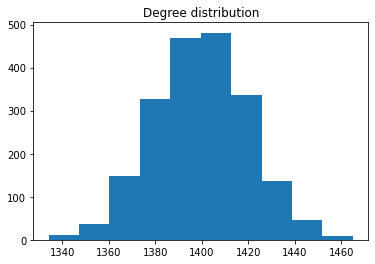

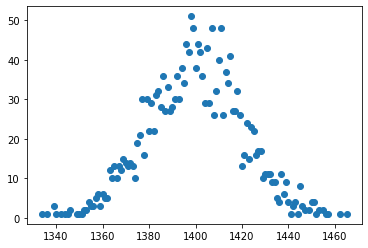

In [29]:
#Build in function in networkx - to compare the results
from networkx.generators.random_graphs import erdos_renyi_graph
GER = erdos_renyi_graph(n,p)

#GRAPH PLOT
#plt.title(r"$p = %.2f$"%p)
#nx.draw_circular(GER,with_labels=True)
#plt.savefig("C:/STUDIA, DOCS/APPLIED MATHEMATICS/SEMESTER 1/Diffusion processes on complex networks/ERbuildin101.png")
#plt.show()

#DATA ANALYSIS

numGR = GER.number_of_edges()
vertGR = GER.number_of_nodes()
aver_degreeGR = 2*numGR/vertGR     #np.mean(G.degree())
var_deGR = np.var(list(GER.degree())[1])
print('Number of edges: ', numGR)
print('Number of nodes: ', vertGR)
print('Average degree: ', aver_degreeGR)
print('Variance of the degree distribution: ', var_deGR)

#Degree distribution
degree_dist(GER)

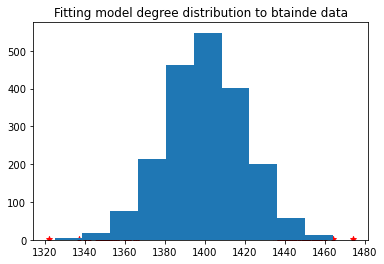

In [27]:
#FITIING MODEL DEGREE DISTRIBUTION TO OBTAINED DATA
degrees = [G.degree(n) for n in G.nodes()]
degreesGER = [GER.degree(n) for n in GER.nodes()]
plt.figure(1)
plt.title('Fitting model degree distribution to btainde data')
plt.hist(degreesGER) #histogram - data from build in function erdos_renyi_graph(n,p)
degree_counts = Counter(degrees)                                                                                                 
x, y = zip(*degree_counts.items())
plt.scatter(x,y, marker='*', color="red")   #from obtainde data via implemented function                                                                                                 
plt.show()